<center> <h1><b>Estrategia: R-cuadrado</b> </h1></center>

Esta estrategia usa el modelo de Fama-French de cuatro factores.

\begin{equation}
    r_i−r_f = β_0+β_1(r_m−r_f)+β_2 SMB+β_3 HML + \epsilon_i
\end{equation}

Donde:

* $r_i$: Es el retorno del i-esimo activo, $i = 1, 2, ..., N.$
* $r_f$: Es la tasa libre de riesgo.
* $r_i − r_f$: Es el retorno en exceso del activo.
* $r_m − r_f$: Es la prima de riesgo de mercado.
* SMB: Es el factor tamaño o small minus big market cap, este factor nos dice que las empresas de menor capitalización de mercado tienen un rendimiento superior que las empresas de mayor capitalización.
* HML: Es el factor valor o high minus low price to book, este factor nos dice que las empresas con un alto ratio price to book tienen un rendimiento superior que las empresas de bajo ratio price to book.
* $\beta_j (j>0)$: Paramétros a ajustar mediante métodos de regresión.
* $\beta_0 = \alpha_i$: interceptos hallados mediante métodos de regresión.
* $\epsilon_i$: Residuo

In [1]:
# # Correr esta celda una sola vez
# !pip install --upgrade version_information
# !pip install pandas_datareader
# !pip install yfinance

In [2]:
import pandas_datareader.data as reader    # Para traer la data directamente de la página de Fama-French
import pandas as pd
import numpy as np
import os
from datetime import date
import yfinance as yf
import version_information
import matplotlib.pyplot as plt

### Nombre de archivos importantes pagina Fama-French 

**3 factor famma french**

- Mensual: 'F-F_Research_Data_Factors'
- Semanal: 'F-F_Research_Data_Factors_weekly'
- Diaria: 'F-F_Research_Data_Factors_daily'

**Momentum factor**

- Mensual: 'F-F_Momentum_Factor'
- Diaria: 'F-F_Momentum_Factor_daily'

### 1. Traer la data (mensual, semanal,...) 
    
Se van a traer tres distintos dataframes: el primero contiene los tres factores originales del modelo de Fama-French, el segundo contiene el cuarto factor (Momento) y el cuarto dataFrame contiene los precios de cierre de los activos que componen el portafolio.

In [3]:
# define paths
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results

# read ETFs list
ETFs = pd.read_excel(path_rsrc + "list_of_ETFs.xlsx")

In [4]:
end = date.today()
start = date(end.year - 5, end.month, end.day)

# Tres factores principales de fama-french
ff_df = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0]/100

# factor de momento
ff_MOM_df = reader.DataReader('F-F_Momentum_Factor', 'famafrench', start, end)[0]/100

# acciones
# el mismo que la data ade fama-french
s = ff_df.index[-1]
end1 = date(s.year, s.month, 29)
# un mes atras respecto a la data de fama-french
start1 = date(end.year - 5, end.month-1, 1)

tickers = ETFs["Financials"].to_list()
precios = yf.download(tickers, start=start1, end=end1, interval="1mo")["Close"]
precios.index = pd.to_datetime(precios.index, format="%Y%m").to_period("M")

[*********************100%***********************]  25 of 25 completed


In [5]:
precios.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-05,16.750000,1674.000000,21.469999,64.169998,439.600006,25.620001,40.180000,31.590000,66.459999,63.340000,...,54.790001,23.379999,61.000000,30.400000,63.180000,28.280001,43.419998,41.029999,69.110001,27.180000
2018-06,16.639999,1508.199951,20.230000,63.000000,443.200012,26.049999,39.200001,31.330000,64.110001,61.490002,...,53.610001,23.040001,59.500000,29.799999,61.000000,27.940001,42.330002,40.430000,67.449997,26.590000
2018-07,17.040001,1530.599976,21.129999,69.519997,398.799988,26.260000,41.049999,32.029999,65.239998,65.610001,...,56.220001,23.790001,62.869999,31.709999,61.509998,28.860001,43.959999,43.490002,70.610001,27.950001
2018-08,17.340000,1637.400024,19.920000,74.720001,368.799988,29.291000,41.590000,32.840000,65.760002,66.000000,...,57.020000,23.690001,63.770000,32.040001,63.150002,29.590000,44.209999,45.240002,71.580002,28.330000
2018-09,17.080000,1364.599976,20.280001,70.339996,388.399994,28.750000,40.330002,31.980000,62.230000,66.330002,...,54.060001,22.790001,63.759998,32.060001,59.419998,29.590000,43.000000,43.270000,69.370003,27.580000


In [6]:
precios.shape

(60, 25)

In [7]:
ff_df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-06,0.0048,0.0115,-0.0233,0.0014
2018-07,0.0319,-0.0223,0.0047,0.0016
2018-08,0.0344,0.0113,-0.0398,0.0016
2018-09,0.0006,-0.0228,-0.0169,0.0015
2018-10,-0.0768,-0.0477,0.0344,0.0019


In [8]:
ff_df.shape

(59, 4)

In [9]:
ff_MOM_df.tail()

,Mom
Date,
2022-12,0.0452
2023-01,-0.1598
2023-02,0.0021
2023-03,-0.0250
2023-04,0.0156


In [10]:
ff_MOM_df.shape

(59, 1)

<h3> 2. Unir Fama-French DataFrames

In [11]:
ff_4f = ff_df.merge(ff_MOM_df, on=ff_df.index)
ff_4f.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom'] 
ff_4f.set_index(["Date"], inplace=True)
ff_4f.head()

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2018-06,0.0048,0.0115,-0.0233,0.0014,-0.0235
2018-07,0.0319,-0.0223,0.0047,0.0016,-0.0141
2018-08,0.0344,0.0113,-0.0398,0.0016,0.0529
2018-09,0.0006,-0.0228,-0.0169,0.0015,0.0004
2018-10,-0.0768,-0.0477,0.0344,0.0019,-0.0199


<h3> 3. Retornos

Al calular los retornos, la primera fila va quedar sin datos que por lo cual que se elimina. Esta es la razón por la que se descargo la data de los precios de cierre con una fecha demás respecto al dataframe de Fama-French. Luego, ajustamos los retornos de los precios con la columna "RF" de Fama-French, para asi obtener el retorno en exceso para cada activo.

In [12]:
retornos = precios.pct_change()
retornos.dropna(inplace=True)
retornos.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-06,-0.006567,-0.099044,-0.057755,-0.018233,0.008189,0.016784,-0.024390,-0.008230,-0.035360,-0.029207,...,-0.021537,-0.014542,-0.024590,-0.019737,-0.034505,-0.012023,-0.025104,-0.014623,-0.024020,-0.021707
2018-07,0.024039,0.014852,0.044488,0.103492,-0.100181,0.008061,0.047194,0.022343,0.017626,0.067003,...,0.048685,0.032552,0.056639,0.064094,0.008361,0.032928,0.038507,0.075686,0.046850,0.051147
2018-08,0.017606,0.069777,-0.057265,0.074799,-0.075226,0.115423,0.013155,0.025289,0.007971,0.005944,...,0.014230,-0.004203,0.014315,0.010407,0.026662,0.025295,0.005687,0.040239,0.013737,0.013596
2018-09,-0.014994,-0.166606,0.018072,-0.058619,0.053145,-0.018470,-0.030296,-0.026188,-0.053680,0.005000,...,-0.051912,-0.037991,-0.000157,0.000624,-0.059066,0.000000,-0.027369,-0.043546,-0.030875,-0.026474
2018-10,-0.063817,-0.269236,-0.089251,-0.167614,0.157570,-0.125565,-0.052070,-0.067542,-0.021372,-0.075079,...,-0.055679,-0.046950,-0.045797,-0.063007,-0.091383,-0.057452,-0.059302,-0.105385,-0.053481,-0.047136


In [13]:
ret_rf = pd.DataFrame(retornos.values - ff_4f[["RF"]].values, columns= retornos.columns, index=retornos.index)
ret_rf.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-06,-0.007967,-0.100444,-0.059155,-0.019633,0.006789,0.015384,-0.025790,-0.009630,-0.036760,-0.030607,...,-0.022937,-0.015942,-0.025990,-0.021137,-0.035905,-0.013423,-0.026504,-0.016023,-0.025420,-0.023107
2018-07,0.022439,0.013252,0.042888,0.101892,-0.101781,0.006461,0.045594,0.020743,0.016026,0.065403,...,0.047085,0.030952,0.055039,0.062494,0.006761,0.031328,0.036907,0.074086,0.045250,0.049547
2018-08,0.016006,0.068177,-0.058865,0.073199,-0.076826,0.113823,0.011555,0.023689,0.006371,0.004344,...,0.012630,-0.005803,0.012715,0.008807,0.025062,0.023695,0.004087,0.038639,0.012137,0.011996
2018-09,-0.016494,-0.168106,0.016572,-0.060119,0.051645,-0.019970,-0.031796,-0.027688,-0.055180,0.003500,...,-0.053412,-0.039491,-0.001657,-0.000876,-0.060566,-0.001500,-0.028869,-0.045046,-0.032375,-0.027974
2018-10,-0.065717,-0.271136,-0.091151,-0.169514,0.155670,-0.127465,-0.053970,-0.069442,-0.023272,-0.076979,...,-0.057579,-0.048850,-0.047697,-0.064907,-0.093283,-0.059352,-0.061202,-0.107285,-0.055381,-0.049036


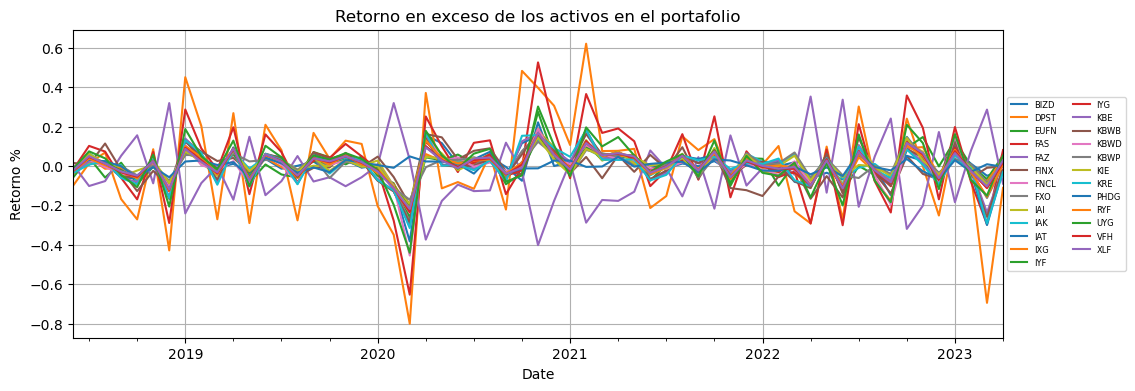

In [52]:
ax = ret_rf.plot(figsize=(12, 4), title="Retorno en exceso de los activos en el portafolio", ylabel="Retorno %")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2, fontsize=6)
plt.grid()
plt.show()

<h3> 4. Implementar modelo

Primero se reescribe la ecuación a ajustar en forma matricial (debido a que es mucho más eficiente programar operaciones matriciales, que en su lugar, por ejemplo ejecutar todo mediante un ciclo for para através de cada activo en el portafolio). Para ello, se suponen $N$ activos y que el retorno en exceso $R_i, i=1,2,...,N$ viene dado por:

$$R_i = \alpha_i + \sum_{k=1}^{4} β_{i,k} F_k $$

En forma matricial para todos los activos, se tiene la siguiente forma:

$$R = \alpha + BF + \epsilon $$

\begin{equation}
    R =  
    \begin{bmatrix}
        R_1 \\
        R_2 \\
        \vdots\\
        R_N 
    \end{bmatrix},\quad
    \alpha =  
    \begin{bmatrix}
        \alpha_1 \\
        \alpha_2 \\
        \vdots\\
        \alpha_N 
    \end{bmatrix}, \quad
    B =
    \begin{bmatrix}
        \beta_{1,1} & \beta_{1,2} & \beta_{1,3} & \beta_{1,4}\\
        \beta_{2,1} & \beta_{2,2} & \beta_{2,3} & \beta_{2,4}\\
        \vdots      & \vdots      & \vdots & \vdots     \\
        \beta_{N,1} & \beta_{N,2} & \beta_{N,3} &\beta_{N,4}
    \end{bmatrix}, \quad
    F =  
    \begin{bmatrix}
        r_m - r_f \\
        SMB       \\
        HML       \\
        Mom 
    \end{bmatrix}.
\end{equation}

\begin{equation}
\end{equation}

In [15]:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [16]:
# usando sklearn
X = ff_4f[['Mkt-RF', 'SMB', 'HML','Mom']].values
y = ret_rf.values

lr = LinearRegression()
lr.fit(X, y)
B = np.matrix(lr.coef_)
alpha = lr.intercept_

# Coefficient of determination
r_sq = lr.score(X, y)

In [17]:
r_sq

0.8293172314884576

In [18]:
B = pd.DataFrame(B, index=precios.columns, columns=['Mkt-RF', 'SMB', 'HML','Mom'])
alpha = pd.DataFrame(alpha, index=precios.columns, columns=["Alpha"])
regresion_df = pd.concat([alpha, B], axis=1)

In [19]:
ret_rf.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-06,-0.007967,-0.100444,-0.059155,-0.019633,0.006789,0.015384,-0.025790,-0.009630,-0.036760,-0.030607,...,-0.022937,-0.015942,-0.025990,-0.021137,-0.035905,-0.013423,-0.026504,-0.016023,-0.025420,-0.023107
2018-07,0.022439,0.013252,0.042888,0.101892,-0.101781,0.006461,0.045594,0.020743,0.016026,0.065403,...,0.047085,0.030952,0.055039,0.062494,0.006761,0.031328,0.036907,0.074086,0.045250,0.049547
2018-08,0.016006,0.068177,-0.058865,0.073199,-0.076826,0.113823,0.011555,0.023689,0.006371,0.004344,...,0.012630,-0.005803,0.012715,0.008807,0.025062,0.023695,0.004087,0.038639,0.012137,0.011996
2018-09,-0.016494,-0.168106,0.016572,-0.060119,0.051645,-0.019970,-0.031796,-0.027688,-0.055180,0.003500,...,-0.053412,-0.039491,-0.001657,-0.000876,-0.060566,-0.001500,-0.028869,-0.045046,-0.032375,-0.027974
2018-10,-0.065717,-0.271136,-0.091151,-0.169514,0.155670,-0.127465,-0.053970,-0.069442,-0.023272,-0.076979,...,-0.057579,-0.048850,-0.047697,-0.064907,-0.093283,-0.059352,-0.061202,-0.107285,-0.055381,-0.049036


In [20]:
regresion_df

,Alpha,Mkt-RF,SMB,HML,Mom
BIZD,-0.006445,0.998311,0.444688,0.483837,-0.167697
DPST,-0.014805,2.247543,3.488868,2.795206,-0.385002
EUFN,-0.006237,0.897107,-0.134031,0.641656,-0.414442
FAS,-0.000277,2.891632,0.380154,1.557546,-0.083406
FAZ,-0.017113,-2.565187,0.018483,-0.832161,-0.066727
FINX,-0.010726,1.286757,0.626797,-0.376232,0.100599
FNCL,-0.003159,0.999934,0.195357,0.611081,-0.066693
FXO,-0.000713,0.987486,0.593237,0.713572,-0.026531
IAI,-0.000240,0.988733,0.253115,0.414951,-0.001801
IAK,0.000678,0.837651,0.051199,0.638160,0.114213


### 4.1 Calculo R cuadrado

Ahora se calculan los $R^{2}$ para los valores $\alpha$ estimados. Este se calculara a partir de las siguientes cantidades:

1. Promedio de el exceso de los retornos $\overline{R}(t).$
2. Suma de cuadrados $SS_{tot}.$
3. Suma de cuadrados residual $SS_{res}.$
4. $R^{2}$ de la regresión.

1. Comenzando por el promedio de los retornos (siguiendo la siguiente definición)
$$ \overline{R}_i = \frac{1}{T} \sum_{t=1}^{T} R_{i,t}$$

\begin{equation}
\end{equation}

In [21]:
# retorno medio
retorno_medio = ret_rf.mean(axis=0)
retorno_medio

BIZD    0.000081
DPST   -0.009402
EUFN    0.000709
FAS     0.020353
FAZ    -0.037230
FINX   -0.000775
FNCL    0.003704
FXO     0.004852
IAI     0.006713
IAK     0.006377
IAT    -0.002800
IXG     0.002201
IYF     0.004549
IYG     0.004216
KBE    -0.001750
KBWB   -0.001431
KBWD   -0.004026
KBWP    0.005929
KIE     0.005520
KRE    -0.003043
PHDG    0.001886
RYF     0.004219
UYG     0.008718
VFH     0.003759
XLF     0.004619
dtype: float64

2. Ahora, el calculo de la suma de cuadrados $SS_{tot}$:

$$SS_{tot_{i}} = \sum_{t=1}^{T} \big(R_{i,t} - \overline{R}_{i}\big)^2$$

\begin{equation}
\end{equation}

In [22]:
# suma de cuadrados
ss_tot = (ret_rf - retorno_medio).apply(lambda x: x**2).sum()
ss_tot

BIZD    0.377755
DPST    4.008006
EUFN    0.376914
FAS     2.242863
FAZ     1.702603
FINX    0.446659
FNCL    0.285964
FXO     0.337563
IAI     0.275041
IAK     0.214618
IAT     0.495967
IXG     0.248999
IYF     0.237917
IYG     0.311469
KBE     0.469276
KBWB    0.478555
KBWD    0.488794
KBWP    0.181116
KIE     0.206222
KRE     0.519244
PHDG    0.056626
RYF     0.296469
UYG     0.917258
VFH     0.285252
XLF     0.272391
dtype: float64

3. Luego, se calcula la suma de los cuadrados 

$$SS_{res_{i}} = \sum_{t=1}^{T} \epsilon_{i,t}^{2}$$

\begin{equation}
    \epsilon_{i}(t) = R_{i} - β_1[r_m−r_f](t) - β_2 SMB(t) - β_3 HML(t)
\end{equation}

Empezando por los valores de los residuos, se tiene que en forma matricial, la anterior ecuación puede ser reescrita como:

\begin{equation}
    \epsilon = R - BF
\end{equation}

\begin{equation}
    \epsilon =  
    \begin{bmatrix}
        \epsilon_1 \\
        \epsilon_2 \\
        \vdots\\
        \epsilon_N 
    \end{bmatrix}, \quad
        R =  
    \begin{bmatrix}
        R_1 \\
        R_2 \\
        \vdots\\
        R_N 
    \end{bmatrix},\quad
    B =
    \begin{bmatrix}
        \beta_{1,1} & \beta_{1,2} & \beta_{1,3} & \beta_{1,4}\\
        \beta_{2,1} & \beta_{2,2} & \beta_{2,3} & \beta_{2,4}\\
        \vdots      & \vdots      & \vdots & \vdots     \\
        \beta_{N,1} & \beta_{N,2} & \beta_{N,3} &\beta_{N,4}
    \end{bmatrix}, \quad
    F =  
    \begin{bmatrix}
        r_m - r_f \\
        SMB       \\
        HML       \\
        Mom 
    \end{bmatrix}.
\end{equation}

\begin{equation}
\end{equation}

* F -----> X,  fama-franch factors (defined previously).
* B -----> coefficients matrix.
* R -----> y, returns vector.

Primero calculamos los valores de  epsilón:

In [23]:
F = ff_4f[["Mkt-RF", "SMB", "HML", "Mom"]]
epsilon = pd.DataFrame().reindex_like(ret_rf)
raw_shape = len(ret_rf.columns)
for i in range(len(ret_rf)):
    cache = (ret_rf.iloc[i].values.reshape(raw_shape, 1) - B @ F.iloc[i].values.reshape(4, 1)).values.reshape(raw_shape)
    epsilon.iloc[i] = cache

In [24]:
epsilon.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-06,-0.010540,-0.095274,-0.056709,-0.003554,-0.002068,-0.004403,-0.020166,-0.005190,-0.034790,-0.017664,...,-0.018526,-0.017336,-0.013523,-0.012436,-0.031489,-0.016130,-0.022296,-0.010348,-0.019962,-0.016615
2018-07,-0.004130,0.000791,0.002422,0.009630,-0.016569,-0.017422,0.014240,-0.001257,-0.011846,0.038434,...,0.023737,-0.004099,0.032087,0.035593,0.002716,0.019662,0.010252,0.007085,0.013649,0.015713
2018-08,0.004767,0.083053,-0.040749,0.035833,-0.018382,0.042180,0.002799,0.012819,-0.013892,-0.005693,...,0.019656,-0.007937,0.005960,-0.002165,0.022544,-0.001034,-0.005414,0.014073,0.003103,0.003427
2018-09,0.001290,-0.042515,0.023988,-0.026830,0.039569,-0.012849,-0.017588,-0.002684,-0.042989,0.014904,...,-0.022454,-0.019069,0.007025,0.009270,-0.013632,-0.005371,-0.010718,-0.031478,-0.018503,-0.016880
2018-10,0.012183,-0.035923,-0.058966,0.015457,-0.013157,0.016200,0.009795,0.009619,0.050426,-0.029885,...,0.013765,0.031009,-0.013315,-0.014511,0.000588,-0.023239,0.007906,0.010039,0.008488,0.009995


Ahora, se procede con el calculo de los valores de $SS_{res_{i}}:$

In [25]:
ss_res = epsilon.apply(lambda x: x**2).sum(axis=0)
ss_res.head()

BIZD    0.091566
DPST    0.758233
EUFN    0.095496
FAS     0.249781
FAZ     0.435852
dtype: float64

4. Y, finalmente el termino $R^{2}_{i}$ como sigue:

\begin{equation}
    R^{2}_{i} = 1 - \frac{SS_{res_{i}}}{SS_{tot_{i}}}
\end{equation}

\begin{equation}
\end{equation}

In [26]:
R_squared = 1 - (ss_res / ss_tot)
R_squared

BIZD    0.757606
DPST    0.810820
EUFN    0.746637
FAS     0.888633
FAZ     0.744009
FINX    0.808117
FNCL    0.913755
FXO     0.905748
IAI     0.810971
IAK     0.790909
IAT     0.810757
IXG     0.895229
IYF     0.900206
IYG     0.901731
KBE     0.867184
KBWB    0.849360
KBWD    0.855624
KBWP    0.620999
KIE     0.796906
KRE     0.842172
PHDG    0.488907
RYF     0.893029
UYG     0.914970
VFH     0.913517
XLF     0.909810
dtype: float64

In [27]:
regresion_df["R2"] = R_squared

Se actualiza ahora la tabla de valores de los coeficientes con los valores hallados para $R^2$.

In [28]:
regresion_df = regresion_df[["Mkt-RF", "SMB", "HML", "Mom", "Alpha", "R2"]]
regresion_df

,Mkt-RF,SMB,HML,Mom,Alpha,R2
BIZD,0.998311,0.444688,0.483837,-0.167697,-0.006445,0.757606
DPST,2.247543,3.488868,2.795206,-0.385002,-0.014805,0.810820
EUFN,0.897107,-0.134031,0.641656,-0.414442,-0.006237,0.746637
FAS,2.891632,0.380154,1.557546,-0.083406,-0.000277,0.888633
FAZ,-2.565187,0.018483,-0.832161,-0.066727,-0.017113,0.744009
FINX,1.286757,0.626797,-0.376232,0.100599,-0.010726,0.808117
FNCL,0.999934,0.195357,0.611081,-0.066693,-0.003159,0.913755
FXO,0.987486,0.593237,0.713572,-0.026531,-0.000713,0.905748
IAI,0.988733,0.253115,0.414951,-0.001801,-0.000240,0.810971
IAK,0.837651,0.051199,0.638160,0.114213,0.000678,0.790909


## 5. Estrategía

La organización previa a la estrategia consiste en lo siguiente:
1. Ordenar los ETFs en quintiles según el $R^2$.
2. Luego ordenar los ETFs en cada uno de tales quintiles según el alfa.
3. Estrategia:
    * Comprar ETFs en el grupo correspondiente al quintil $R^2$ más bajo y en el subquintil con alfa más alto.
    * Vender ETFs en el grupo correspondiente al quintil $R^2$ más alto y el subquintil con alfa más bajo.

In [29]:
# quintiles based on r2 value
r2_quintile = pd.DataFrame(pd.qcut(regresion_df["R2"].sort_values(ascending=False), 5, labels=False),)
r2_quintile.columns = ["Quintil R2"]
r2_quintile

,Quintil R2
UYG,4
FNCL,4
VFH,4
XLF,4
FXO,4
IYG,3
IYF,3
IXG,3
RYF,3
FAS,3


In [30]:
Quintil_R2 = pd.concat([regresion_df[["R2", "Alpha"]].sort_values(ascending=False, by="R2"), r2_quintile], axis=1, )
Quintil_R2

,R2,Alpha,Quintil R2
UYG,0.914970,-0.006010,4
FNCL,0.913755,-0.003159,4
VFH,0.913517,-0.003165,4
XLF,0.909810,-0.002580,4
FXO,0.905748,-0.000713,4
IYG,0.901731,-0.003497,3
IYF,0.900206,-0.002780,3
IXG,0.895229,-0.004313,3
RYF,0.893029,-0.001959,3
FAS,0.888633,-0.000277,3


In [37]:
quintil_alpha = Quintil_R2.groupby("Quintil R2", group_keys=False)["Alpha"].apply(lambda x: pd.qcut(x, q=5, labels=False))
quintil_alpha.name = "Quintil Alpha"

In [36]:
estrategia_df = pd.concat([Quintil_R2, quintil_alpha], axis=1)
estrategia_df.head()

,R2,Alpha,Quintil R2,Quintil Alpha
UYG,0.914970,-0.006010,4,0
FNCL,0.913755,-0.003159,4,2
VFH,0.913517,-0.003165,4,1
XLF,0.909810,-0.002580,4,3
FXO,0.905748,-0.000713,4,4


In [33]:
estrategia_df["Recommendation"] = np.where((estrategia_df["Quintil R2"] == 0) &
                                          (estrategia_df["Quintil Alpha"] == 4),
                                           "BUY", 0)
estrategia_df["Recommendation"] = np.where((estrategia_df["Quintil R2"] == 4) &
                                          (estrategia_df["Quintil Alpha"] == 0),
                                           "SELL", estrategia_df["Recommendation"])

In [34]:
estrategia_df[estrategia_df["Recommendation"] != "0"]

,R2,Alpha,Quintil R2,Quintil Alpha,Recommendation
UYG,0.914970,-0.006010,4,0,SELL
KBWP,0.620999,0.001277,0,4,BUY


In [35]:
%load_ext version_information
%version_information numpy, scipy, pandas, sklearn

Software versions
Python 3.10.9 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.10.0
OS Windows 10 10.0.22621 SP0
numpy 1.23.5
scipy 1.10.0
pandas 1.5.3
sklearn 1.2.1
Tue Jun 13 15:29:14 2023 Hora est. Pacífico, Sudamérica